# Cuerda oscilante amortiguada

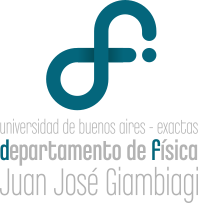  

©2021 [Víctor A. Bettachini](mailto:bettachini@df.uba.ar)  

---

In [1]:
import sympy as sym
from sympy.physics import mechanics as mech
# mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración
import warnings
warnings.filterwarnings("ignore")

## Enunciado

Una cuerda de densidad de masa uniforme $\mu$ y longitud $L$ está tensada $T_0$ entre extremos fijos.
Actúa una fuerza de amortiguamiento proporcional a su velocidad de oscilación.
Hallar la forma más general de $\psi(x,t)$.

## Ecuación de onda clásica

De plantear la 2.a ley de Newton se llegaba a

In [2]:
lambda_m, T_0 = sym.symbols('\lambda_m, T_0', positive= True)
t, x = sym.symbols('t, x')
psi = sym.Function('\psi')(x,t)
ec_clásica = sym.Eq(lambda_m* psi.diff(t, 2), T_0* psi.diff(x,2) )
ec_clásica

Eq(\lambda_m*Derivative(\psi(x, t), (t, 2)), T_0*Derivative(\psi(x, t), (x, 2)))

La solución que funcionaba en esta

In [3]:
B, k, C, omega, phi = sym.symbols('B, k, C, omega, phi')
psi_clásica = sym.Eq(psi,
                     (B* sym.sin(k* x) + C* sym.cos(k* x) )*  sym.cos(omega* t + phi) )
psi_clásica

Eq(\psi(x, t), (B*sin(k*x) + C*cos(k*x))*cos(omega*t + phi))

provenía de haber propuesto soluciones exponenciales, las mismas que nos funcionaron para los modos normales, y luego obtener una expresión real del resultado.

### Separación de variables

La técnica de resolución de la ecuación de ondas se ampara en que exista una solución como la anterior donde se multiplica una parte espacial y otra temporal

In [4]:
superX = sym.Function('X')(x)
superT = sym.Function(r'\tilde{T}')(t)
psi_separadas = sym.Eq(psi, superX* superT)
psi_separadas

Eq(\psi(x, t), X(x)*\tilde{T}(t))

Se reemplaza esa solucíon en la ecuación de ondas clásica

In [5]:
ec_substituida = ec_clásica.subs(psi, psi_separadas.rhs)
ec_substituida

Eq(\lambda_m*Derivative(X(x)*\tilde{T}(t), (t, 2)), T_0*Derivative(X(x)*\tilde{T}(t), (x, 2)))

Se divide por tal solución y se logra que a cada lado de la igualdad solo quede dependencia con una de las variables

In [6]:
ec_normalizada = sym.Eq(ec_substituida.lhs/ psi_separadas.rhs,
                        ec_substituida.rhs/ psi_separadas.rhs ).simplify()
ec_normalizada

Eq(T_0*Derivative(X(x), (x, 2))/X(x), \lambda_m*Derivative(\tilde{T}(t), (t, 2))/\tilde{T}(t))

Con el detalle de dejar libre de constantes el lado temporal

In [7]:
ec_normalizada2 = sym.Eq(ec_normalizada.lhs/ lambda_m, ec_normalizada.rhs/ lambda_m).simplify()
ec_normalizada2

Eq(Derivative(\tilde{T}(t), (t, 2))/\tilde{T}(t), T_0*Derivative(X(x), (x, 2))/(\lambda_m*X(x)))

queda algo que solo se puede cumplir si ambos lados son iguales a una misma constante.

### Dependencia temporal

Para descubrir esta misteriosa constante, que con toda malicia llamaré $-q^2$, empecemos por lo que conocemos.
La materia empezó resolviendo el caso del lado temporal

In [8]:
q = sym.Symbol('q')
temporalia = sym.Eq(ec_normalizada2.lhs, -q**2)
temporalia

Eq(Derivative(\tilde{T}(t), (t, 2))/\tilde{T}(t), -q**2)

In [9]:
ec_T = sym.Eq(temporalia.lhs.args[1], temporalia.rhs* 1/temporalia.lhs.args[0] )
ec_T

Eq(Derivative(\tilde{T}(t), (t, 2)), -q**2*\tilde{T}(t))

Proponiendo la solución exponencial

In [10]:
llambda = sym.Symbol('\lambda')
sol_t = sym.exp(llambda* t)
sol_t

exp(\lambda*t)

In [11]:
ec_T_exp = ec_T.subs(superT, sol_t)
ec_T_exp

Eq(Derivative(exp(\lambda*t), (t, 2)), -q**2*exp(\lambda*t))

In [12]:
ec_T_exp2 = ec_T_exp.doit()
ec_T_exp2

Eq(\lambda**2*exp(\lambda*t), -q**2*exp(\lambda*t))

Recordarán que de aquí

In [13]:
sym.Eq(ec_T_exp2.lhs/sol_t, ec_T_exp2.rhs/sol_t)

Eq(\lambda**2, -q**2)

Y que como hay dos soluciones para $\lambda$ la solución general

In [14]:
A_1, A_2 = sym.symbols('A_1, A_2')
sym.Eq(superT, A_1* sym.exp(sym.I* llambda* t) + A_2* sym.exp(-sym.I* llambda* t) )

Eq(\tilde{T}(t), A_1*exp(I*\lambda*t) + A_2*exp(-I*\lambda*t))

Y a esta altura esto debe haberles recordado que

In [15]:
sym.Eq(llambda, omega)

Eq(\lambda, omega)

y que entonces la solución a la parte temporal es

In [16]:
sym.Eq(superT, psi_clásica.rhs.args[1])

Eq(\tilde{T}(t), cos(omega*t + phi))

Todos los pasos intermedios están el notebook de la primer clase `pénduloIdeal.ipynb`.

### Dependencia espacial

Ya sin tanto misterio

In [17]:
sym.Eq(ec_normalizada2.rhs, -q**2)

Eq(T_0*Derivative(X(x), (x, 2))/(\lambda_m*X(x)), -q**2)

es

In [18]:
sym.Eq(ec_normalizada2.rhs, -omega**2)

Eq(T_0*Derivative(X(x), (x, 2))/(\lambda_m*X(x)), -omega**2)

o más bien

In [19]:
sym.Eq(ec_normalizada2.rhs/ (T_0/ lambda_m), -omega**2/ (T_0/ lambda_m) )

Eq(Derivative(X(x), (x, 2))/X(x), -\lambda_m*omega**2/T_0)

Probablemente sospechen que como pasaba en la solución temporal a la derecha esta el negativo de la correspondiente frecuencia.
Para la parte espacial esta no es otro que el número de onda

In [20]:
sym.Eq(k**2, omega**2/ (T_0/ lambda_m) )

Eq(k**2, \lambda_m*omega**2/T_0)

La solución para esta parte puede escibirse con una sola trigonométrica con fase o en la más cómoda expresión

In [21]:
sym.Eq(superX, psi_clásica.rhs.args[0])

Eq(X(x), B*sin(k*x) + C*cos(k*x))

## Caso amortiguado

Se suma un nuevo término lineal con la velocidad en la parte de fuerzas

In [22]:
c = sym.Symbol('c')
ec_amortiguado = sym.Eq(lambda_m* psi.diff(t, 2), T_0* psi.diff(x,2) - c* psi.diff(t) )
ec_amortiguado

Eq(\lambda_m*Derivative(\psi(x, t), (t, 2)), T_0*Derivative(\psi(x, t), (x, 2)) - c*Derivative(\psi(x, t), t))

Y el desafio queda en la parte espacial ya que se lleva el nuevo término

In [23]:
amortiguadia = sym.Eq(ec_normalizada2.lhs + c* superT.diff(t)/ (lambda_m* superT), -omega**2)
amortiguadia

Eq(Derivative(\tilde{T}(t), (t, 2))/\tilde{T}(t) + c*Derivative(\tilde{T}(t), t)/(\lambda_m*\tilde{T}(t)), -omega**2)

siendo

In [24]:
amortiguadia2 = sym.Eq(amortiguadia.lhs* superT, amortiguadia.rhs* superT).simplify()
amortiguadia2

Eq(omega**2*\tilde{T}(t), -Derivative(\tilde{T}(t), (t, 2)) - c*Derivative(\tilde{T}(t), t)/\lambda_m)

Aplicando la misma propuesta de solución exponencial

In [25]:
amortiguadia3 = amortiguadia2.subs(superT, sol_t).doit()
amortiguadia3

Eq(omega**2*exp(\lambda*t), -\lambda**2*exp(\lambda*t) - \lambda*c*exp(\lambda*t)/\lambda_m)

In [26]:
amortiguadia4 = sym.Eq(amortiguadia3.lhs/ sol_t, amortiguadia3.rhs.expand()/ sol_t).simplify().expand()
amortiguadia4

Eq(omega**2, -\lambda**2 - \lambda*c/\lambda_m)

In [27]:
llambda_amortiguado = sym.Eq(llambda, sym.solveset(amortiguadia4, llambda), evaluate= False )
llambda_amortiguado

Eq(\lambda, FiniteSet(-c/(2*\lambda_m) - sqrt((-2*\lambda_m*omega + c)*(2*\lambda_m*omega + c))/(2*\lambda_m), -c/(2*\lambda_m) + sqrt((-2*\lambda_m*omega + c)*(2*\lambda_m*omega + c))/(2*\lambda_m)))

Lo interesante sucede en la raíz

In [28]:
llambda_amortiguado.rhs.args[1].args[0]

sqrt((-2*\lambda_m*omega + c)*(2*\lambda_m*omega + c))/(2*\lambda_m)

In [29]:
radice = llambda_amortiguado.rhs.args[1].args[0].simplify()
radice

sqrt(-4*\lambda_m**2*omega**2 + c**2)/(2*\lambda_m)

In [30]:
felicitá = radice.args[0]* sym.sqrt( (radice.args[2].args[0]/ lambda_m**2).expand() )
felicitá

sqrt(-4*omega**2 + c**2/\lambda_m**2)/2

Dando por seguro que $\omega^2 > \frac{c}{\lambda_m}$, se obtendrá una solución oscilatoria con un término de amortiguamiento

In [31]:
sei_positivo = radice.args[0]* sym.sqrt( (-radice.args[2].args[0]/ lambda_m**2).expand() )
exponente_amortiguamiento = llambda_amortiguado.rhs.args[0].args[0]
temporalia_amortiguada = sym.Eq(superT, sym.exp(exponente_amortiguamiento* t)* sym.cos(sei_positivo* t + phi) )
temporalia_amortiguada

Eq(\tilde{T}(t), exp(-c*t/(2*\lambda_m))*cos(phi + t*sqrt(4*omega**2 - c**2/\lambda_m**2)/2))

## Solución general para la cuerda amortiguada

In [32]:
cuerda_amortiguada_general = sym.Eq(psi, psi_clásica.rhs.args[0]* temporalia_amortiguada.rhs)
cuerda_amortiguada_general

Eq(\psi(x, t), (B*sin(k*x) + C*cos(k*x))*exp(-c*t/(2*\lambda_m))*cos(phi + t*sqrt(4*omega**2 - c**2/\lambda_m**2)/2))